/Users/Suhail/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/Suhail/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/Suhail/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=92.957877, expected=92.356600
predicted=102.045371, expected=103.066000
predicted=111.623817, expected=112.057600
predicted=109.152008, expected=111.839900
predicted=102.331260, expected=99.192500
predicted=90.888934, expected=90.817700
predicted=92.979633, expected=92.058700
predicted=102.055367, expected=100.967600
predicted=110.018704, expected=107.568600
predicted=107.106122, expected=114.103600
predicted=106.837345, expected=101.531600
predicted=92.125922, expected=93.006800
predicted=92.883488, expected=93.912600
predicted=101.107785, expected=106.752800
predicted=115.587192, expected=114.833100
predicted=112.864392, expected=108.235300
predicted=98.709460, expected=100.438600
predicted=94.557913, expected=90.994400
predicted=94.448943, expected=91.234800
predicted=102.201825, expected=103.958100
predicted=112.099380, expected=110.763100
predicted=109.344510, expected=107.566500
predicted=98.920736, expected=97.718300
predicted=90.959179, expected=90.997900
predicted=94

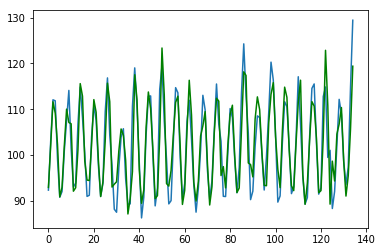

In [14]:
from pandas import datetime
from matplotlib import pyplot
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 

series = pd.read_csv('Electric_Production.csv')
X = list(series['IPG2211A2N'])

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='green')
pyplot.show()